# KNN Classifier

### Dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

### Extra libraries

In [2]:
import math
from copy import deepcopy

In [3]:
#Load data
iris = pd.read_csv('Iris.csv')
#data cleaning
iris.drop(columns="Id",inplace=True)

In [4]:
#features and labels
X=iris.iloc[:,0:4].values
y=iris.iloc[:,4].values

#Train and Test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [5]:
len(X_train)

120

In [6]:
len(X_test)

30

In [7]:
y_test

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [8]:
def get_dist(arr1,arr2):
    assert(len(arr1)==len(arr2))
    dis=0
    for i in range(len(arr1)):
        dx=arr1[i]-arr2[i]
        dis+=dx**2
    dis=math.sqrt(dis)
    return dis

In [9]:
dis_mat=[]
for curr_test_sample in X_test:
    curr_dis_arr=[]
    for i in range(len(X_train)):
        dis_now=get_dist(curr_test_sample, X_train[i])
        curr_dis_arr.append((i,dis_now))
    curr_dis_arr.sort(key=lambda x:x[1])
    dis_mat.append(curr_dis_arr.copy())
    
    #break

In [10]:
dis_mat

[[(32, 0.5099019513592784),
  (107, 0.5099019513592784),
  (64, 0.5196152422706629),
  (46, 0.6403124237432849),
  (3, 0.7280109889280515),
  (89, 0.7280109889280517),
  (100, 0.7549834435270756),
  (27, 0.7745966692414833),
  (111, 0.7874007874011811),
  (62, 0.7874007874011816),
  (4, 0.8062257748298554),
  (24, 0.8124038404635957),
  (40, 0.8124038404635965),
  (7, 0.8306623862918073),
  (29, 0.8366600265340758),
  (56, 0.8366600265340759),
  (59, 0.9000000000000002),
  (96, 0.9273618495495705),
  (116, 0.9327379053088815),
  (101, 0.9327379053088819),
  (0, 0.9848857801796109),
  (16, 1.0246950765959602),
  (25, 1.0295630140987),
  (55, 1.0295630140987002),
  (106, 1.0723805294763613),
  (102, 1.0908712114635712),
  (18, 1.1045361017187258),
  (10, 1.1357816691600549),
  (22, 1.1401754250991376),
  (12, 1.1445523142259602),
  (103, 1.1618950038622253),
  (1, 1.1704699910719623),
  (36, 1.174734012447073),
  (30, 1.183215956619923),
  (17, 1.1958260743101403),
  (65, 1.2165525060596

### Max frequency heuristic (randomization yet to insert for tirbreakers here)

In [11]:
def get_best_label(f_dict):
    best_labels=[]
    max_f_yet=0
    for curr_label, label_freq in f_dict.items():
        if label_freq>max_f_yet:
            max_f_yet=label_freq
            best_labels=[curr_label]
        elif label_freq==max_f_yet:
            assert(len(best_labels)>0)
            best_labels.append(curr_label)
    try:
        #assert(len(best_labels)==1)
        a=3
    except:
        #print(f"Best labels multiple : {best_labels}")
        #print("Multiple")
        b=4
    return best_labels[0]

In [12]:
predicted_labels=dict()

In [13]:
min_k_val=1
max_k_val=30

x_acc=[]
y_acc=[]

for curr_k_val in range(min_k_val, max_k_val+1):
    predicted_labels[curr_k_val]=[]
    for curr_nearest_neighbours in dis_mat:
        f_dict=dict()
        for i in range(curr_k_val):
            now_idx=curr_nearest_neighbours[i][0]
            now_label=y_train[now_idx]
            try:
                f_dict[now_label]+=1
            except:
                f_dict[now_label]=1
            
        curr_predicted_label=get_best_label(f_dict)
        predicted_labels[curr_k_val].append(curr_predicted_label)
    denom=len(y_test)
    num=0
    for i in range(denom):
        if predicted_labels[curr_k_val][i]==y_test[i]:
            num+=1
    curr_acc=num/denom
    curr_acc*=100
    x_acc.append(curr_k_val)
    y_acc.append(curr_acc)
    print(f"for k={curr_k_val}, acc={curr_acc}")
    

    

for k=1, acc=100.0
for k=2, acc=100.0
for k=3, acc=96.66666666666667
for k=4, acc=100.0
for k=5, acc=96.66666666666667
for k=6, acc=100.0
for k=7, acc=100.0
for k=8, acc=100.0
for k=9, acc=100.0
for k=10, acc=100.0
for k=11, acc=100.0
for k=12, acc=100.0
for k=13, acc=100.0
for k=14, acc=100.0
for k=15, acc=100.0
for k=16, acc=100.0
for k=17, acc=100.0
for k=18, acc=100.0
for k=19, acc=100.0
for k=20, acc=100.0
for k=21, acc=100.0
for k=22, acc=100.0
for k=23, acc=100.0
for k=24, acc=100.0
for k=25, acc=100.0
for k=26, acc=100.0
for k=27, acc=96.66666666666667
for k=28, acc=96.66666666666667
for k=29, acc=96.66666666666667
for k=30, acc=96.66666666666667


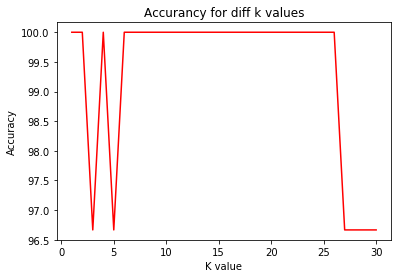

In [14]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
plt.title('Accurancy for diff k values')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.plot(x_acc, y_acc, color = "red", linewidth = 1.5)
plt.show()